# Task 2.3 - Complex Machine Learning Models and Keras Part 2

## 1. Importing Libraries and Data

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [75]:
# Create path variable for re-use when importing data
path = r'C:\Users\sorca\Documents\3ML-2_3\Task'

In [77]:
# Load climate dataframe
df_climate = pd.read_csv(os.path.join(path,'Climate_cleaned.csv'), index_col = False)

In [79]:
df_climate.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  ...  STOCKHOLM_temp_max  \
0            10.9                     1  ...                 4.9   
1            10.1                     6  ...                 5.0   
2             9.9                     6  ...                 4.1   
3            10.6                     8  ...                 2.3   
4             6.0                     8  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 135 columns]

In [81]:
df_climate.shape

(22950, 135)

In [83]:
# Load "pleasant" dataframe
df_pleasant = pd.read_csv(os.path.join(path,'Pleasant_cleaned.csv'), index_col = False)

In [85]:
df_pleasant.head()

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0                       0                          0   
1                       0                          0   
2                       0                          0   
3                       0                          0   
4                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [87]:
df_pleasant.shape

(22950, 15)

## 2. Data Wrangling

In [90]:
# Keep rows for climate data frame where index is between 19298 and 22950 (inclusive) which represent 
# the previous 10 years of data ( 22949-(365x10+2))
df_climate_10yrs = df_climate.loc[19297:22949]

In [92]:
df_climate_10yrs

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
19297                  5            0.82          1.0018   
19298                  7            0.74          0.9941   
19299                  5            0.65          1.0041   
19300                  6            0.56          1.0044   
19301                  8            0.92          1.0041   
...                  ...             ...             ...   
22945                  1            0.79          1.0248   
22946                  6            0.77          1.0244   
22947                  4            0.76          1.0227   
22948                  5            0.80          1.0212   
22949                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
19297                    0.91                 0.00             4.4   
19298                    0.84                 0.12             3.8   
19299                    0.76                 0.40             2.6   
19300                    0.93                 0.71             5.4   
19301                    0.35                 1.76             0.0   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
19297              4.3             0.2             8.5                     2   
19298              8.7             4.7            15.2                     6   
19299             10.7             7.2            15.6                     4   
19300             15.2             9.1            19.8                     2   
19301              9.6             7.5            12.7                     2   
...                ...             ...             ...                   ...   
22945             15.9            11.4            21.4                     2   
22946             16.7            14.3            21.9                     0   
22947             16.7            13.1            22.4                     2   
22948             15.4            11.6            21.1                     1   
22949             13.5             9.9            19.2                     4   

       ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
19297  ...                 5.7                     5               0.82   
19298  ...                 8.0                     5               0.82   
19299  ...                 8.8                     5               0.82   
19300  ...                 8.6                     5               0.82   
19301  ...                 7.1                     5               0.82   
...    ...                 ...                   ...                ...   
22945  ...                14.2                     5               0.82   
22946  ...                14.3                     5               0.82   
22947  ...                14.4                     5               0.82   
22948  ...                12.4                     5               0.82   
22949  ...                12.6                     5               0.82   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
19297             1.0142                       0.55                    0.41   
19298             1.0142                       0.55                    0.41   
19299             1.0142                       0.49                    0.41   
19300             1.0142                       0.43                    0.41   
19301             1.0142                       0.63                    0.41   
...                  ...                        ...                     ...   
22945             1.0142      

In [94]:
# Keep rows for 'pleasant' data frame where index is between 19298 and 22950 (inclusive) which represent 
# the previous 10 years of data ( 22949-(365x10+2))
df_pleasant_10yrs = df_pleasant.loc[19297:22949]

In [96]:
df_pleasant_10yrs

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
19297                       0                          0   
19298                       0                          0   
19299                       0                          0   
19300                       0                          1   
19301                       0                          1   
...                       ...                        ...   
22945                       0                          0   
22946                       0                          0   
22947                       0                          0   
22948                       0                          0   
22949                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
19297                          0                        0   
19298                          0                        0   
19299                          0                        0   
19300                          0                        0   
19301                          0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
19297                            0                          0   
19298                            0                          0   
19299                            0                          0   
19300                            0                          0   
19301                            0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
19297                        0                           0   
19298                        0                           0   
19299                        0                           0   
19300                        0                           0   
19301                        0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
19297                            0                        0   
19298                            0                        0   
19299                            0                        0   
19300                            0                        0   
19301                            0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
19297                          0                      0   
19298                          0                      0   
19299                          0                      0   
19300                          1  

## 3. Reshaping for modeling

In [99]:
# Reshape X and y from a df to arrays
X = np.array(df_climate_10yrs)
y = np.array(df_pleasant_10yrs)

In [101]:
X.shape

(3653, 135)

In [103]:
y.shape

(3653, 15)

## 4. Split the data

In [189]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [191]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(914, 135) (914, 15)


In [193]:
X_train

array([[ 7.    ,  0.83  ,  1.0309, ..., 10.7   ,  7.9   , 13.5   ],
       [ 4.    ,  0.73  ,  1.0431, ..., 10.7   ,  7.9   , 13.5   ],
       [ 5.    ,  0.73  ,  1.0214, ..., 10.7   ,  7.9   , 13.5   ],
       ...,
       [ 6.    ,  0.68  ,  1.027 , ..., 10.7   ,  7.9   , 13.5   ],
       [ 6.    ,  0.74  ,  1.0122, ..., 10.7   ,  7.9   , 13.5   ],
       [ 5.    ,  0.75  ,  1.0173, ..., 10.7   ,  7.9   , 13.5   ]])

## 5. Random Forest Model

### Model 1

In [196]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [198]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6039387308533917


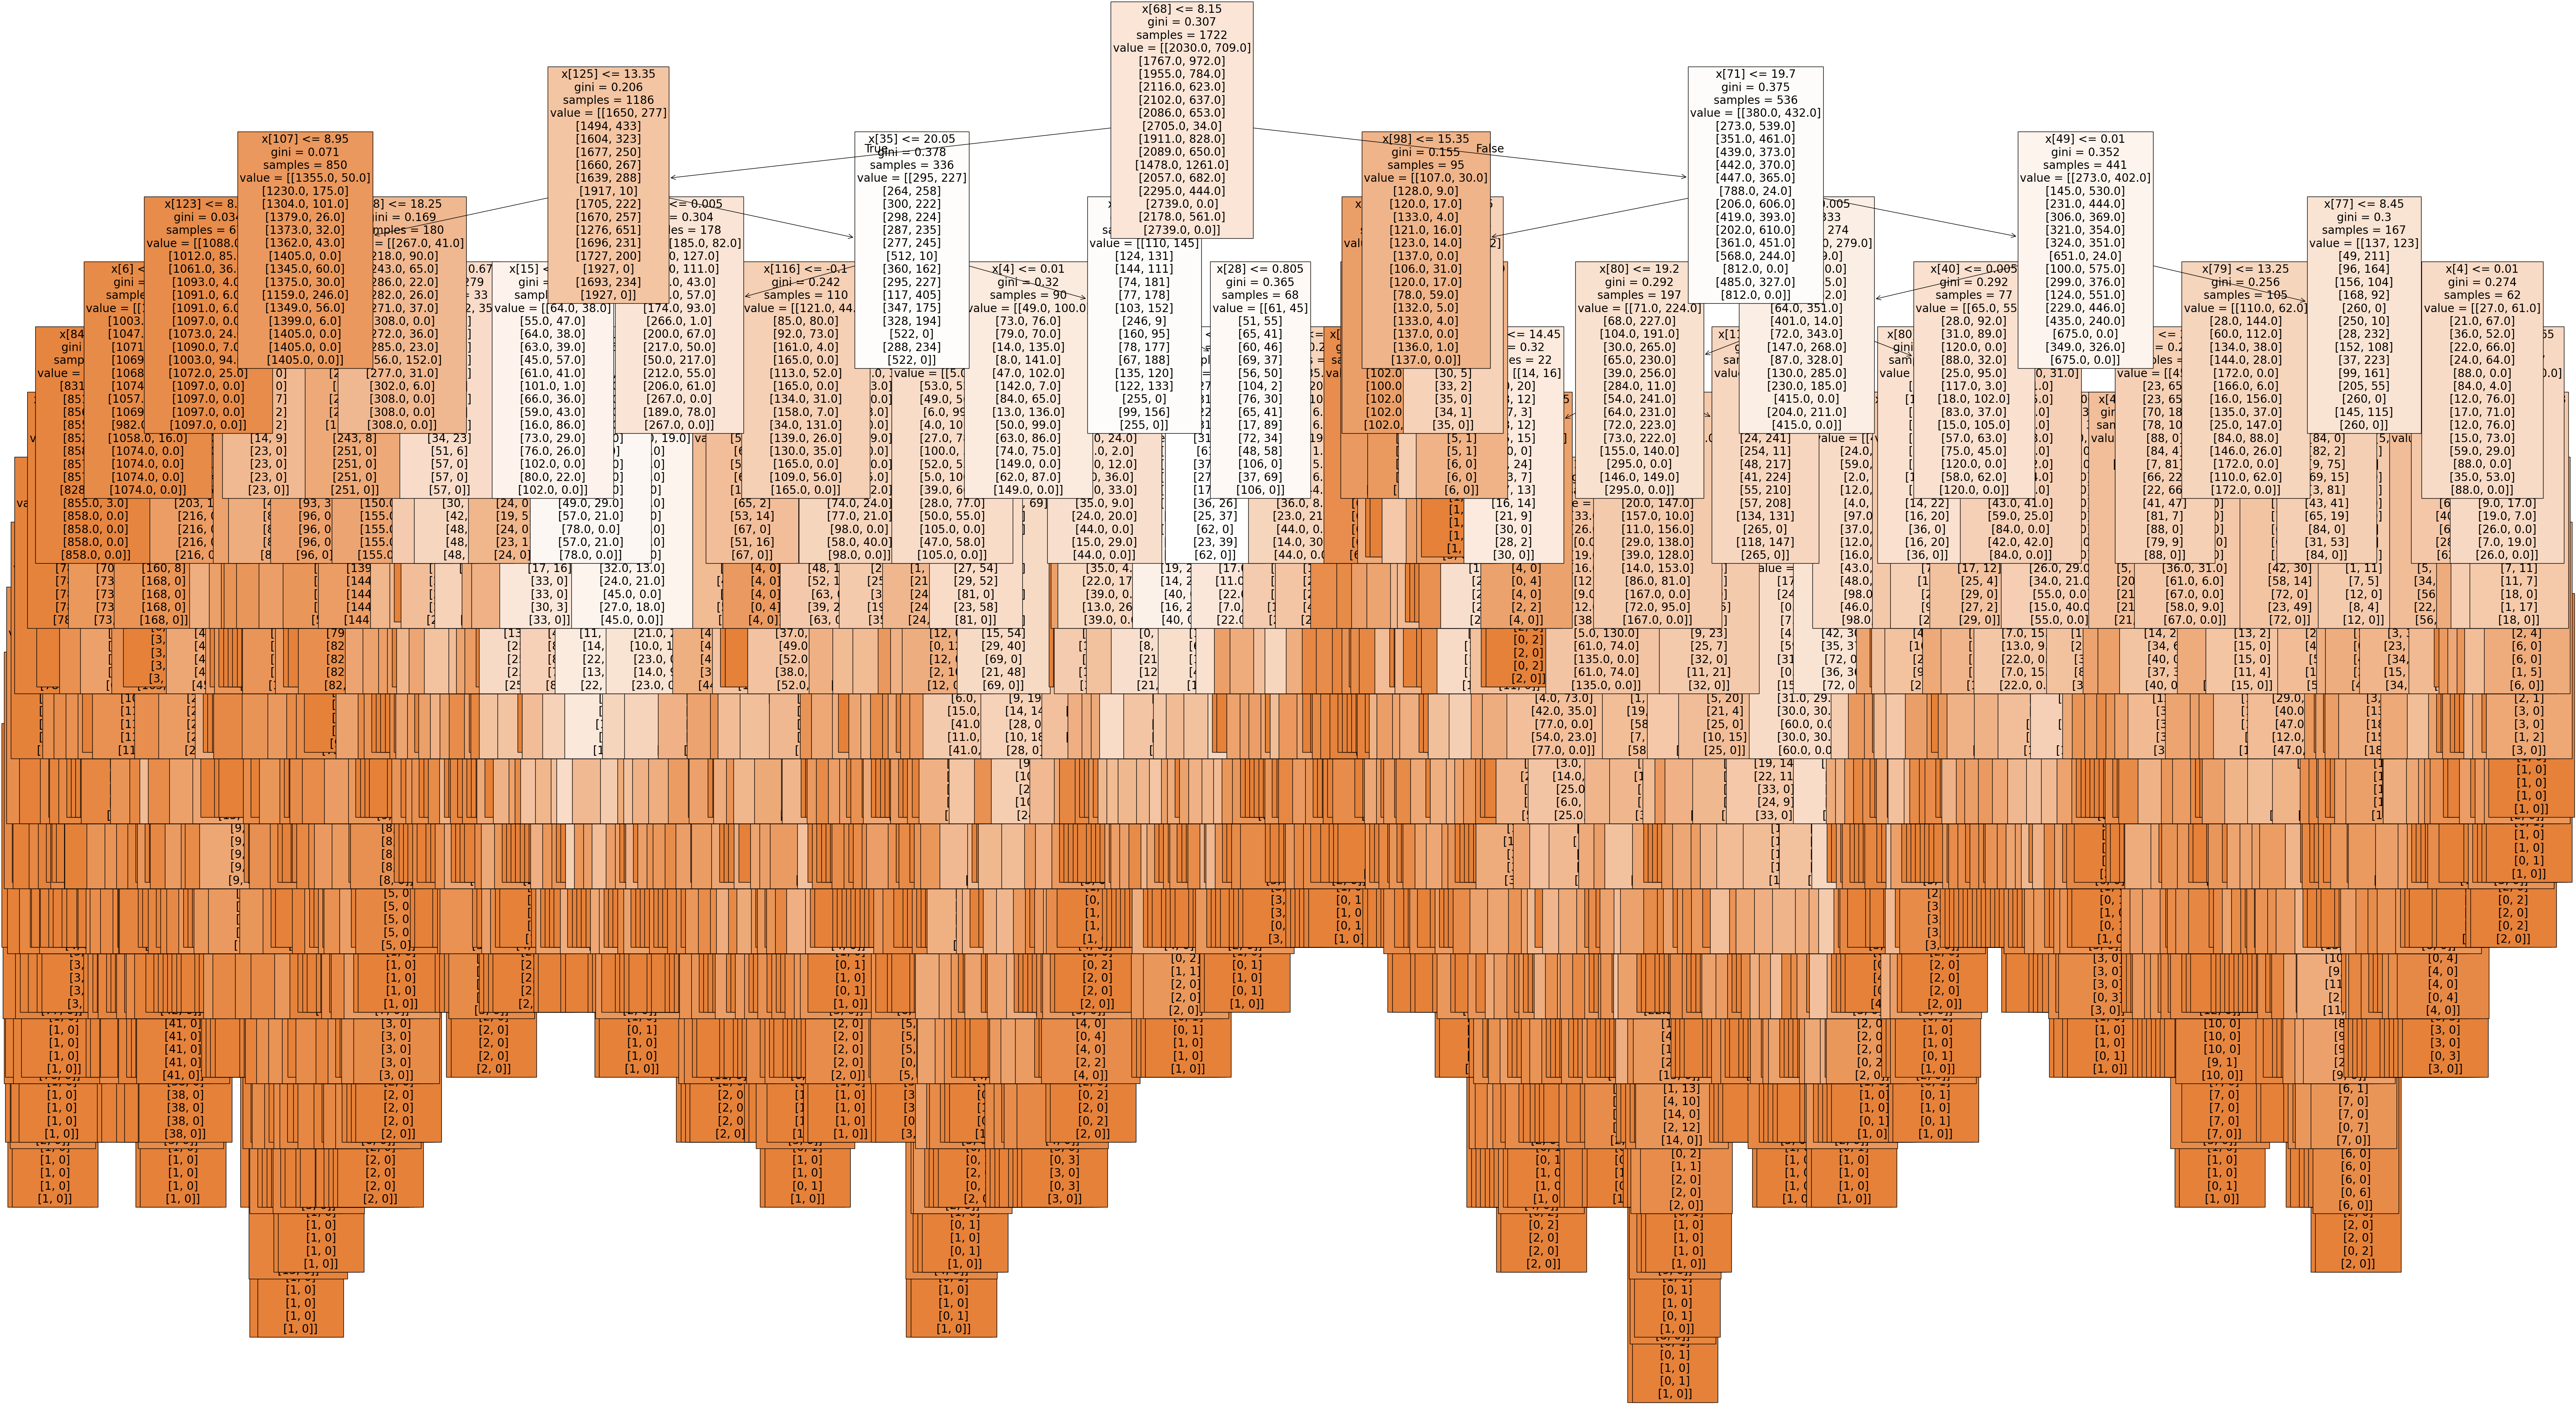

In [200]:
pred = ['Unpleasant Weather','Pleasant Weather']

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=pred, filled=True);

In [202]:
fig.savefig(f"{path}/decision_tree.png")

### Model 2

In [204]:
# Split data into train and test sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y,random_state = 30)

In [205]:
print(X_train_1.shape, y_train_1.shape)
print(X_test_1.shape, y_test_1.shape)

(2739, 135) (2739, 15)
(914, 135) (914, 15)


In [206]:
X_train_1

array([[ 8.    ,  0.9   ,  1.0089, ..., 10.7   ,  7.9   , 13.5   ],
       [ 2.    ,  0.69  ,  1.0263, ..., 10.7   ,  7.9   , 13.5   ],
       [ 7.    ,  0.75  ,  1.018 , ..., 10.7   ,  7.9   , 13.5   ],
       ...,
       [ 8.    ,  0.88  ,  1.015 , ..., 10.7   ,  7.9   , 13.5   ],
       [ 8.    ,  0.9   ,  1.0001, ..., 10.7   ,  7.9   , 13.5   ],
       [ 3.    ,  0.8   ,  1.0161, ..., 10.7   ,  7.9   , 13.5   ]])

In [211]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train_1, y_train_1)

RandomForestClassifier()

In [213]:
# Perform predictions on the test dataset
y_pred_1 = clf.predict(X_test_1)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_1, y_pred_1))

Model Accuracy:  0.650984682713348


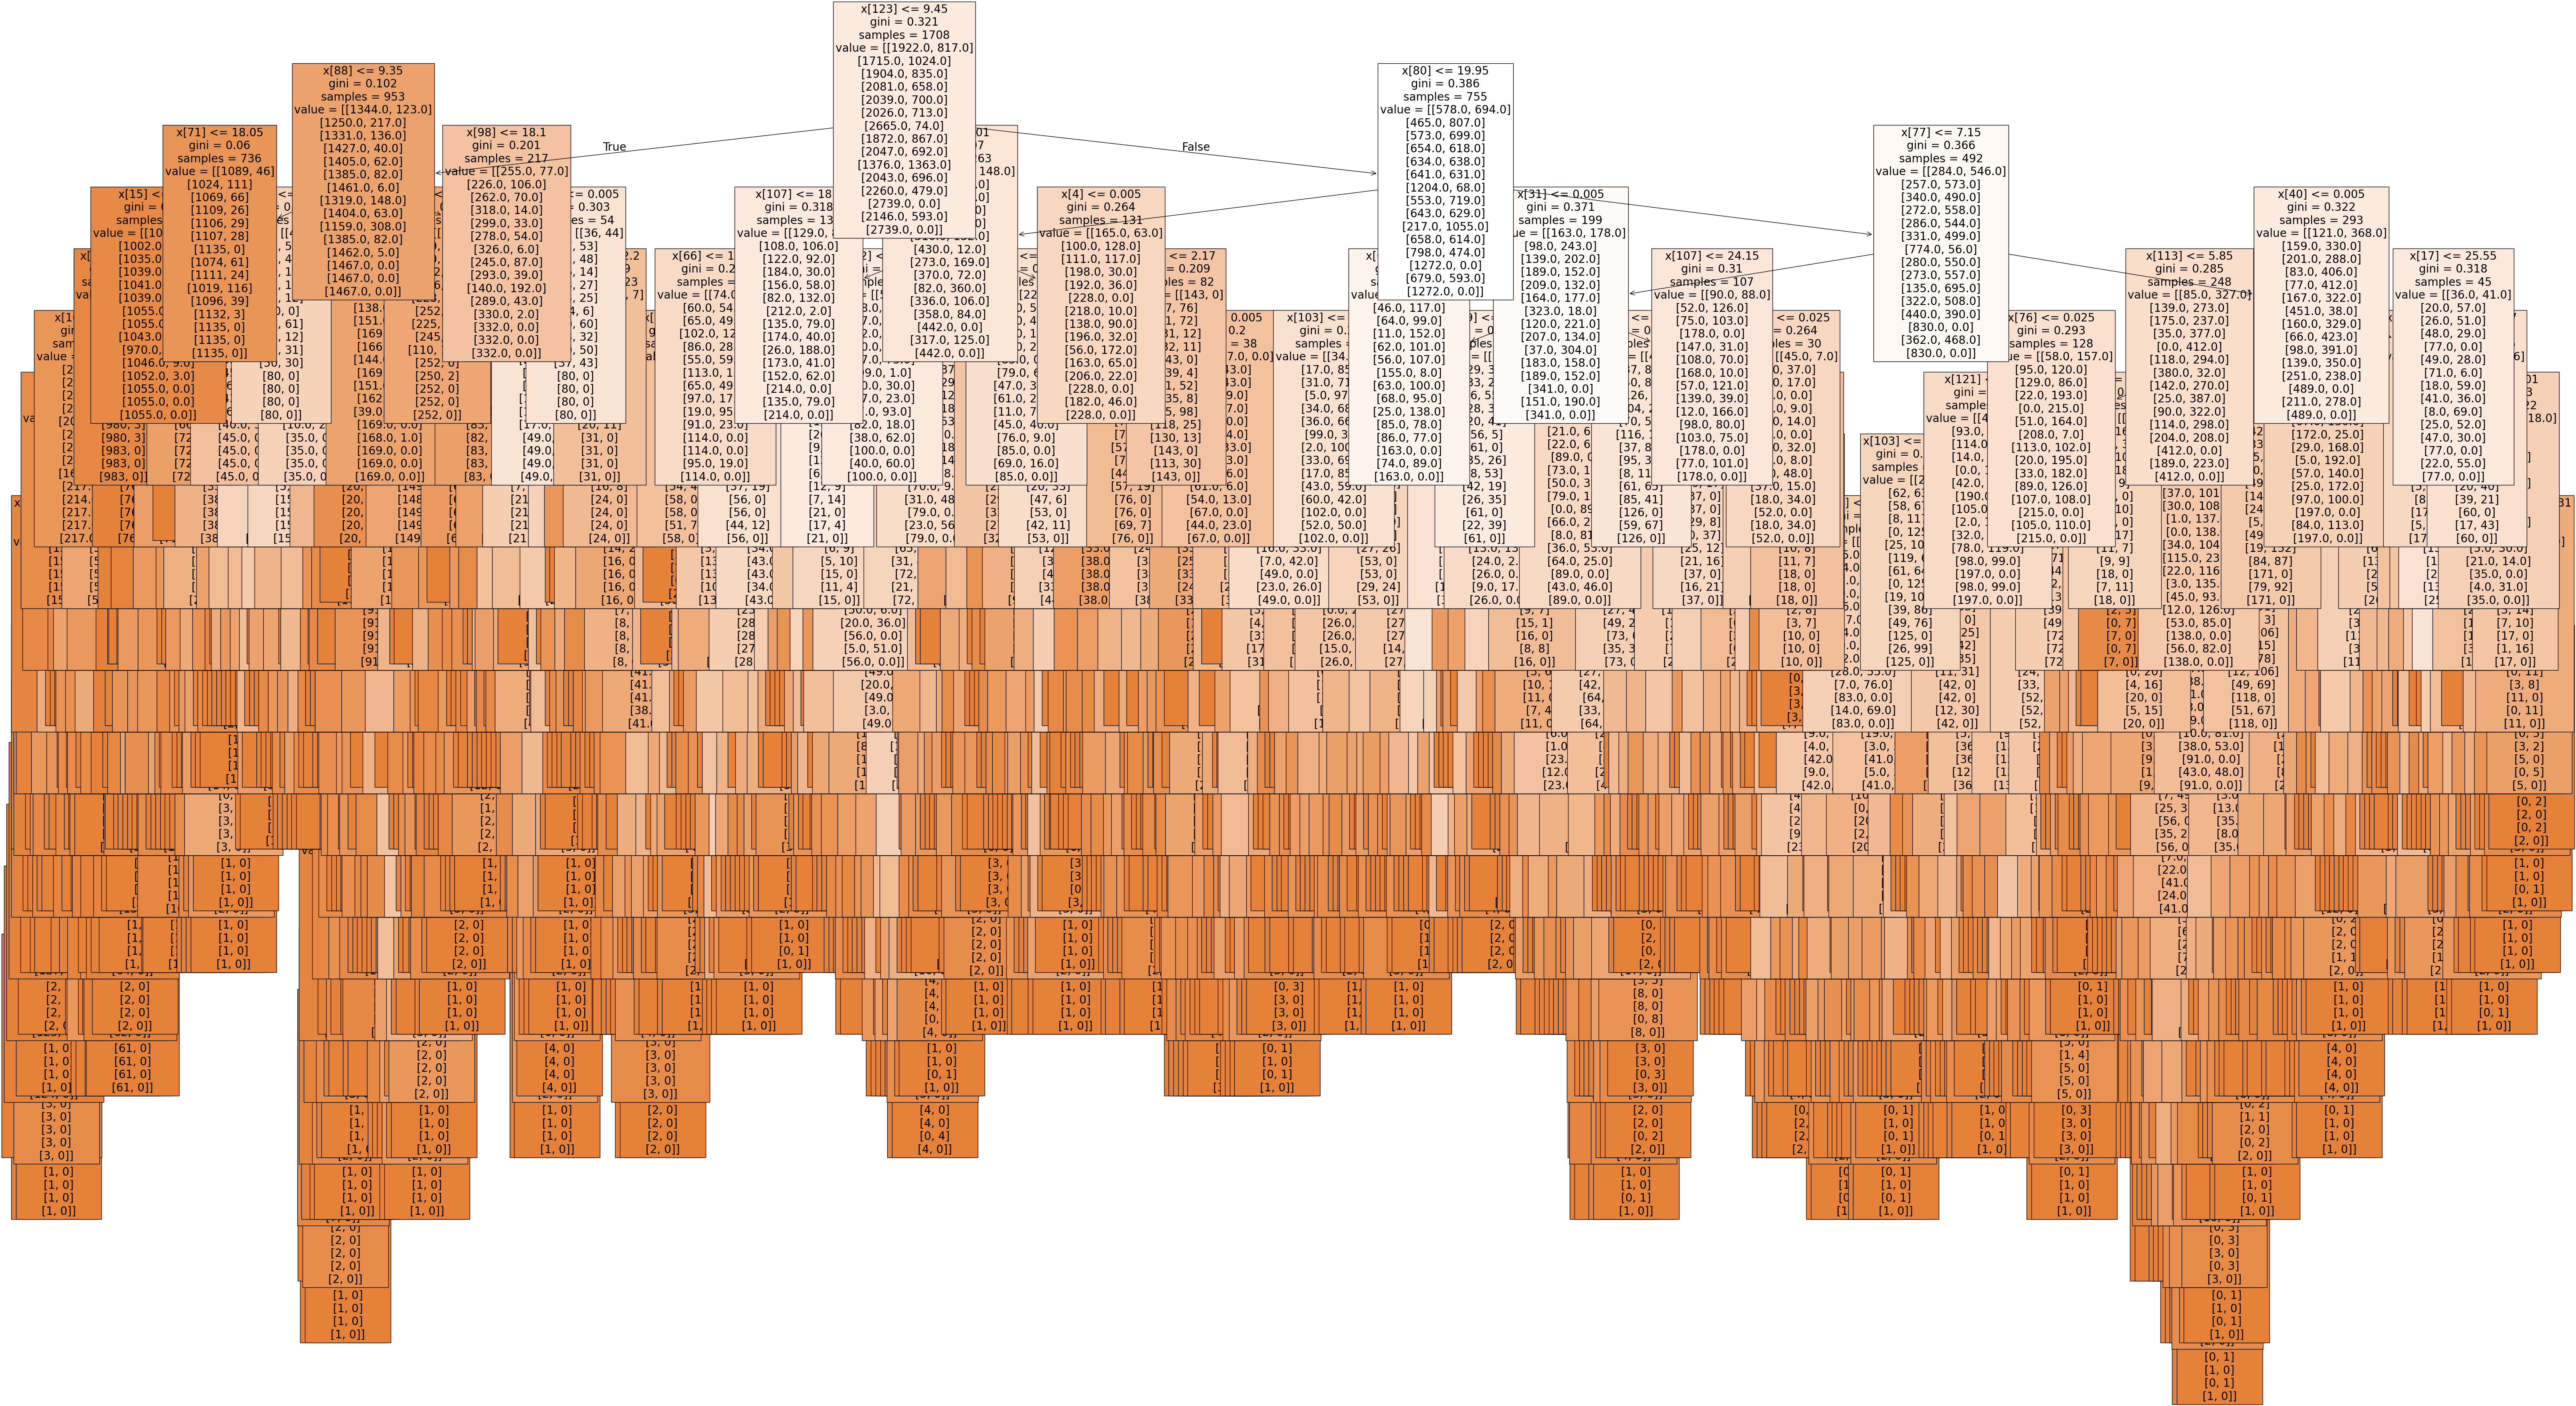

In [215]:
pred = ['Unpleasant Weather','Pleasant Weather']

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=pred, filled=True);

In [217]:
fig.savefig(f"{path}/decision_tree_1.png")

## 6. Feature Importances

In [220]:
# Retrieve feature importances from the trained model
newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(135,)


array([3.79978170e-03, 4.09714345e-03, 3.35874571e-03, 3.84991400e-03,
       1.94574449e-02, 7.76558924e-03, 1.45122958e-02, 5.53861702e-03,
       4.43496568e-02, 3.90513248e-03, 2.52435363e-03, 4.00898143e-03,
       2.70233445e-03, 1.74556346e-02, 2.98833210e-03, 5.89817451e-03,
       4.15732474e-03, 8.82806899e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.63052695e-06, 1.80947188e-02, 4.05079488e-06,
       1.24452629e-02, 6.46130759e-03, 1.42470477e-02, 2.34869807e-03,
       4.13811968e-03, 5.29020505e-03, 5.31464400e-03, 1.42055820e-02,
       6.72631794e-03, 2.16475145e-02, 3.19742826e-03, 3.21976580e-02,
       2.79307714e-03, 4.40600987e-03, 4.81510573e-03, 4.49883752e-03,
       2.13547028e-02, 6.82370525e-03, 1.56097563e-02, 3.11271007e-03,
       1.83695177e-02, 2.63792425e-03, 3.90350295e-03, 4.48717968e-03,
       3.71509248e-03, 1.34417457e-02, 4.02191696e-03, 2.38879969e-02,
       2.91634557e-03, 1.19044358e-02, 3.30771425e-03, 8.07117372e-04,
      

In [222]:
# Reshape newarray
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[3.79978170e-03, 4.09714345e-03, 3.35874571e-03, 3.84991400e-03,
         1.94574449e-02, 7.76558924e-03, 1.45122958e-02, 5.53861702e-03,
         4.43496568e-02],
        [3.90513248e-03, 2.52435363e-03, 4.00898143e-03, 2.70233445e-03,
         1.74556346e-02, 2.98833210e-03, 5.89817451e-03, 4.15732474e-03,
         8.82806899e-03],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.63052695e-06,
         1.80947188e-02, 4.05079488e-06, 1.24452629e-02, 6.46130759e-03,
         1.42470477e-02],
        [2.34869807e-03, 4.13811968e-03, 5.29020505e-03, 5.31464400e-03,
         1.42055820e-02, 6.72631794e-03, 2.16475145e-02, 3.19742826e-03,
         3.21976580e-02],
        [2.79307714e-03, 4.40600987e-03, 4.81510573e-03, 4.49883752e-03,
         2.13547028e-02, 6.82370525e-03, 1.56097563e-02, 3.11271007e-03,
         1.83695177e-02],
        [2.63792425e-03, 3.90350295e-03, 4.48717968e-03, 3.71509248e-03,
         1.34417457e-02, 4.02191696e-03, 2.38879969e-02, 2.91634557

In [224]:
# Collapse this shape into one observation for each weather station
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.10672919, 0.05246834, 0.05125702, 0.09506617, 0.08178342,
       0.07091614, 0.01042007, 0.08915545, 0.1355536 , 0.06174002,
       0.08734026, 0.06779899, 0.03337487, 0.05391299, 0.00248348])

In [228]:
df_climate.columns.tolist()

['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',


In [276]:
cities = [
    'Basel',
    'Belgrade',
    'Budapest',
    'Debilt',
    'Dusseldorf',
    'Heathrow',
    'Kassel',
    'Ljubljana',
    'Maastricht',
    'Madrid',
    'Munchenb',
    'Oslo',
    'Sonnblick',
    'Stockholm',
    'Valentia'
]

In [278]:
cities

['Basel',
 'Belgrade',
 'Budapest',
 'Debilt',
 'Dusseldorf',
 'Heathrow',
 'Kassel',
 'Ljubljana',
 'Maastricht',
 'Madrid',
 'Munchenb',
 'Oslo',
 'Sonnblick',
 'Stockholm',
 'Valentia']

In [280]:
important = pd.Series(sumarray, index = cities)
important = important.sort_values(ascending = False)
important

Maastricht    0.135554
Basel         0.106729
Debilt        0.095066
Ljubljana     0.089155
Munchenb      0.087340
Dusseldorf    0.081783
Heathrow      0.070916
Oslo          0.067799
Madrid        0.061740
Stockholm     0.053913
Belgrade      0.052468
Budapest      0.051257
Sonnblick     0.033375
Kassel        0.010420
Valentia      0.002483
dtype: float64

In [284]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': cities,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)
df_importance

Weather Station  Importance
8       Maastricht    0.135554
0            Basel    0.106729
3           Debilt    0.095066
7        Ljubljana    0.089155
10        Munchenb    0.087340
4       Dusseldorf    0.081783
5         Heathrow    0.070916
11            Oslo    0.067799
9           Madrid    0.061740
13       Stockholm    0.053913
1         Belgrade    0.052468
2         Budapest    0.051257
12       Sonnblick    0.033375
6           Kassel    0.010420
14        Valentia    0.002483

['Basel', 'Belgrade', 'Budapest', 'Debilt', 'Dusseldorf', 'Heathrow', 'Kassel', 'Ljubljana', 'Maastricht', 'Madrid', 'Munchenb', 'Oslo', 'Sonnblick', 'Stockholm', 'Valentia']


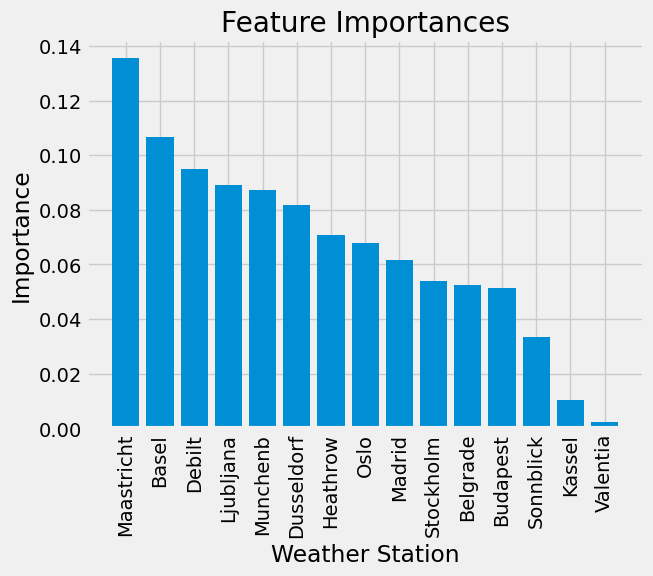

In [286]:
%matplotlib inline

plt.style.use('fivethirtyeight')
print(cities)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Feature Importances')

plt.savefig(os.path.join(path,'Feature_Importances.png'), bbox_inches='tight')

plt.show()

## 7. Create datasets for the top three stations in order of importance

### 7.1. Maastricht

In [293]:
df_climate.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  ...  STOCKHOLM_temp_max  \
0            10.9                     1  ...                 4.9   
1            10.1                     6  ...                 5.0   
2             9.9                     6  ...                 4.1   
3            10.6                     8  ...                 2.3   
4             6.0                     8  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 135 columns]

In [303]:
# Filter climate dataset to only include Maastricht
df_climate_maas = df_climate[df_climate.columns[df_climate.columns.astype(str).str.startswith('MAASTRICHT')]]

# Check output
df_climate_maas.head()

MAASTRICHT_cloud_cover  MAASTRICHT_humidity  MAASTRICHT_pressure  \
0                       7                 0.83               1.0063   
1                       8                 0.92               1.0062   
2                       7                 0.97               1.0167   
3                       7                 0.89               1.0277   
4                       7                 0.92               1.0259   

   MAASTRICHT_global_radiation  MAASTRICHT_precipitation  MAASTRICHT_sunshine  \
0                         0.22                      0.32                  1.0   
1                         0.17                      1.34                  0.4   
2                         0.12                      0.46                  0.0   
3                         0.16                      0.00                  0.3   
4                         0.12                      0.56                  0.0   

   MAASTRICHT_temp_mean  MAASTRICHT_temp_min  MAASTRICHT_temp_max  
0                   9.5                  8.5                 11.1  
1                   8.6                  7.5                  9.9  
2                   6.9                  5.5                  9.9  
3                   7.0                  3.0                 10.0  
4                   8.1                  2.5                 11.1

In [307]:
df_climate_maas.shape

(22950, 9)

In [305]:
# Filter pleasant dataset to only include Maastricht
df_pleasant_maas = df_pleasant[df_pleasant.columns[df_pleasant.columns.astype(str).str.startswith('MAASTRICHT')]]

# Check output
df_pleasant_maas.head()

MAASTRICHT_pleasant_weather
0                            0
1                            0
2                            0
3                            0
4                            0

In [309]:
df_pleasant_maas.shape

(22950, 1)

### 7.2. Basel

In [314]:
# Filter climate dataset to only include Basel
df_climate_basel = df_climate[df_climate.columns[df_climate.columns.astype(str).str.startswith('BASEL')]]

# Check output
df_climate_basel.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  
0            10.9  
1            10.1  
2             9.9  
3            10.6  
4             6.0

In [316]:
df_climate_basel.shape

(22950, 9)

In [318]:
# Filter pleasant dataset to only include Basel
df_pleasant_basel = df_pleasant[df_pleasant.columns[df_pleasant.columns.astype(str).str.startswith('BASEL')]]

# Check output
df_pleasant_basel.head()

BASEL_pleasant_weather
0                       0
1                       0
2                       0
3                       0
4                       0

In [320]:
df_pleasant_basel.shape

(22950, 1)

### 7.3. Debilt

In [322]:
# Filter climate dataset to only include Debilt
df_climate_debilt = df_climate[df_climate.columns[df_climate.columns.astype(str).str.startswith('DEBILT')]]

# Check output
df_climate_debilt.head()

DEBILT_cloud_cover  DEBILT_humidity  DEBILT_pressure  \
0                   7             0.85           1.0032   
1                   8             0.90           1.0056   
2                   6             0.92           1.0165   
3                   8             0.95           1.0265   
4                   6             0.90           1.0243   

   DEBILT_global_radiation  DEBILT_precipitation  DEBILT_sunshine  \
0                     0.07                  0.25              0.0   
1                     0.14                  0.06              0.1   
2                     0.28                  0.01              3.0   
3                     0.08                  0.09              0.0   
4                     0.04                  0.39              0.0   

   DEBILT_temp_mean  DEBILT_temp_min  DEBILT_temp_max  
0               9.3              7.4             11.0  
1               7.7              6.4              8.3  
2               6.8              4.6              9.9  
3               6.7              3.6             10.1  
4               8.0              2.4             11.2

In [324]:
df_climate_debilt.shape

(22950, 9)

In [326]:
# Filter pleasant dataset to only include Debilt
df_pleasant_debilt = df_pleasant[df_pleasant.columns[df_pleasant.columns.astype(str).str.startswith('DEBILT')]]

# Check output
df_pleasant_debilt.head()

DEBILT_pleasant_weather
0                        0
1                        0
2                        0
3                        0
4                        0

In [328]:
df_pleasant_debilt.shape

(22950, 1)

## 8. Create a random forest model for each station